In [2]:
import pandas as pd
import numpy as np
import os
import requests
import zipfile
import io
import glob
import re
from datetime import datetime

In [4]:
data_frame = pd.read_csv('CombinedData.csv')

C:\Users\antri\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0,19,49,59) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df = data_frame

In [6]:
data_frame['member_id'].unique()

array([ nan])

In [7]:
## drop all those rows in which half the number of columns has null values in the data.
df= df.dropna(thresh=int(len(df.columns)/2))

In [8]:
df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,10119623,NaN,12000.0,12000.0,12000.0,36 months,11.99%,398.52,B,B3,...,0.0,3.0,100.0,1.0,0.0,0.0,365874.0,44327.0,10700.0,57674.0
1,10224583,NaN,11100.0,11100.0,11100.0,36 months,14.98%,384.68,C,C3,...,1.0,1.0,75.0,50.0,0.0,0.0,385000.0,6619.0,4000.0,0.0


In [7]:
### drop rows if it 

In [9]:
def missing_values_table(df): 
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum()/len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        return mis_val_table_ren_columns 

In [10]:
missing_values_table(df)

,Missing Values,% of Total Values
id,0,0.000000
member_id,1307181,100.000000
loan_amnt,0,0.000000
funded_amnt,0,0.000000
funded_amnt_inv,0,0.000000
term,0,0.000000
int_rate,0,0.000000
installment,0,0.000000
grade,0,0.000000
sub_grade,0,0.000000


In [11]:
## read first 10 columns to clean ..
df.ix[:1,0:10].head(2)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade
0,10119623,NaN,12000.0,12000.0,12000.0,36 months,11.99%,398.52,B,B3
1,10224583,NaN,11100.0,11100.0,11100.0,36 months,14.98%,384.68,C,C3


In [12]:
## remove months from column term and it has only 3 null values, replace it with ffill method.

df['term']=df['term'].str.split(' ',2).str[1]
df['term'] = df['term'].fillna(method='ffill')
df['term'] = df['term'].astype(int)
## remove % from column int_rate column and it has only 3 null values, replace it with ffill method.
df['int_rate'] = df['int_rate'].str.split('%',1).str[0]
df['int_rate'] =df['int_rate'].astype(float)

## 
df['loan_amnt'] = df['loan_amnt'].astype(int)
df['funded_amnt'] = df['funded_amnt'].astype(int)
df['installment'] = df['installment'].astype(int)

## grade and sub-grade has no null values.

C:\Users\antri\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\antri\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\antri\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/st

In [13]:
## read next 10 columns to clean ..
df.ix[:1,10:20].head(2)

,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc
0,LTC,10+ years,MORTGAGE,130000.0,Source Verified,Dec-2013,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN
1,Teacher,10+ years,MORTGAGE,90000.0,Not Verified,Dec-2013,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN


In [14]:
df.emp_length.unique()

array(['10+ years', '1 year', '2 years', '4 years', '7 years', '5 years',
       '6 years', '3 years', '8 years', '9 years', '< 1 year', 'n/a'], dtype=object)

In [15]:
## remove years and other character from emp_length to make it numerical 
df['emp_length_clean'] = df.emp_length.str.replace('+','')
df['emp_length_clean'] = df.emp_length_clean.str.replace('<','')
df['emp_length_clean'] = df.emp_length_clean.str.replace('years','')
df['emp_length_clean'] = df.emp_length_clean.str.replace('year','')
df['emp_length_clean'] = df.emp_length_clean.str.replace('n/a','0')
df['emp_length_clean']=pd.to_numeric(df['emp_length_clean'], errors='ignore')
df['emp_length_clean'].fillna(0,inplace=True)
df['emp_length_clean'].unique()
df['emp_length_clean'].astype(int)



C:\Users\antri\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\antri\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\antri\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

0          10
1          10
2           1
3          10
4           2
5           4
6          10
7          10
8           7
9          10
10          5
11          6
12         10
13          3
14          2
15         10
16          4
17          2
18         10
19          4
20         10
21          3
22          2
23         10
24          8
25          1
26          2
27         10
28         10
29         10
           ..
1319008     5
1319009     3
1319010     1
1319011     1
1319012     9
1319013    10
1319014     1
1319015     3
1319017     6
1319018     1
1319019     9
1319020     1
1319021     2
1319022     2
1319023    10
1319025     5
1319026     1
1319027     1
1319028     1
1319029     1
1319030     1
1319031     1
1319032     5
1319035     9
1319036    10
1319037     1
1319038     1
1319039     1
1319040     2
1319054     2
Name: emp_length_clean, dtype: int32

In [16]:
df.ix[:1,20:30].head(2)

,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths
0,debt_consolidation,Debt consolidation,809xx,CO,13.03,0.0,Nov-1997,715.0,719.0,1.0
1,other,Other,103xx,NY,3.73,1.0,Jun-2001,690.0,694.0,0.0


In [17]:
## dti, delinq_2yrs, fico_range_low, fico_range_high, earliest_cr_line has zero null values..
df.dti = df.dti.astype(int)
df.delinq_2yrs = df.delinq_2yrs.astype(int)
df.fico_range_low = df.fico_range_low.astype(int)
df.fico_range_high= df.fico_range_high.astype(int)
df.inq_last_6mths= df.inq_last_6mths.fillna(0)
df.inq_last_6mths = df.inq_last_6mths.astype(int)


C:\Users\antri\Anaconda3\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [18]:
df.ix[:1,30:40].head(2)

,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv
0,NaN,NaN,9.0,0.0,10805.0,67%,19.0,f,0.0,0.0
1,16.0,NaN,9.0,0.0,6619.0,66.2%,12.0,f,0.0,0.0


In [19]:
## fill na
## mths_since_last_delinq has 646467 null values.. (do not think we need this for FE)
df.mths_since_last_delinq = df.mths_since_last_delinq.fillna(0).astype(int)

## mths_since_last_record has 1088168 null values.. (do not think we need this for FE)
df.mths_since_last_record = df.mths_since_last_record.fillna(0).astype(int)

##open_acc has 1088168 null values.. (do not think we need this for FE)
df.open_acc = df.open_acc.fillna(0).astype(int)

## pub_rec, revol_bal,total_acc has no null values
df.pub_rec = df.pub_rec.astype(int)
df.total_acc = df.total_acc.astype(int)
df.revol_bal = df.revol_bal.astype(int)
df.out_prncp = df.out_prncp.astype(int)
df.out_prncp_inv = df.out_prncp_inv.astype(int)

df['revol_util'] = df['revol_util'].str.split('%',1).str[0].astype(float)
## mean revol_util 
df['revol_util']=df['revol_util'].fillna((df.revol_util.mean())).astype(int)


C:\Users\antri\Anaconda3\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
C:\Users\antri\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\antri\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

In [20]:
df.ix[:1,40:50].head(2)

,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d
0,14346.479050,14346.48,12000.0,2346.48,0.0,0.0,0.0,Jan-2017,398.28,NaN
1,13575.640006,13575.64,11100.0,2475.64,0.0,0.0,0.0,Feb-2016,4343.32,NaN


In [21]:
## total_pymnt,total_pymnt_inv
df.total_pymnt = df.total_pymnt.fillna(0).astype(float)
df.total_pymnt_inv = df.total_pymnt_inv.fillna(0).astype(float)
df.total_rec_prncp = df.total_rec_prncp.fillna(0).astype(float)
df.total_rec_int = df.total_rec_int.astype(float)
df.total_rec_late_fee = df.total_rec_late_fee.astype(float)
df.recoveries = df.recoveries.astype(float)
df.collection_recovery_fee = df.collection_recovery_fee.astype(float)
df.last_pymnt_d = df.last_pymnt_d.fillna(method='ffill')
df.last_pymnt_amnt = df.last_pymnt_amnt.fillna(0).astype(float)


C:\Users\antri\Anaconda3\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [22]:
df.ix[:1,50:60].head(2)

,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint
0,Mar-2017,729.0,725.0,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN
1,Aug-2016,724.0,720.0,0.0,16.0,1.0,INDIVIDUAL,NaN,NaN,NaN


In [23]:
df.last_credit_pull_d = df.last_credit_pull_d.fillna(method='ffill')

df.last_fico_range_high = df.last_fico_range_high.astype(int)
df.last_fico_range_low = df.last_fico_range_low.astype(int)
df.collections_12_mths_ex_med = df.collections_12_mths_ex_med.fillna(0).astype(int)
df.mths_since_last_major_derog = df.mths_since_last_major_derog.fillna(0).astype(int)
df.policy_code = df.policy_code.astype(int)
df.application_type = df.application_type.fillna('unknown')
df.annual_inc_joint = df.annual_inc_joint.fillna(0)
df.dti_joint = df.dti_joint.fillna(0)
df.verification_status_joint = df.verification_status_joint.fillna(0)


C:\Users\antri\Anaconda3\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [24]:
df.ix[:1,60:70].head(2)

,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util
0,0.0,0.0,327264.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,353402.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df.acc_now_delinq = df.acc_now_delinq.astype(int)
df.tot_coll_amt = df.tot_coll_amt.fillna(0).astype(int)
df.tot_cur_bal = df.tot_cur_bal.fillna(0).astype(int)
df.open_acc_6m = df.open_acc_6m.fillna(0).astype(int)
df.open_il_6m = df.open_il_6m.fillna(0).astype(int)
df.open_il_12m =df.open_il_12m.fillna(0).astype(int)
df.open_il_24m = df.open_il_24m.fillna(0).astype(int)
df.mths_since_rcnt_il = df.mths_since_rcnt_il.fillna(0).astype(int)
df.total_bal_il =df.total_bal_il.fillna(0).astype(int)
df.il_util= df.il_util.fillna(0).astype(int)



C:\Users\antri\Anaconda3\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [26]:
df.ix[:,70:80].head(2)

,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal
0,NaN,NaN,NaN,NaN,16200.0,NaN,NaN,NaN,4.0,36362.0
1,NaN,NaN,NaN,NaN,10000.0,NaN,NaN,NaN,2.0,39267.0


In [27]:
df.total_rev_hi_lim =df.total_rev_hi_lim.fillna(0).astype(float)
df.acc_open_past_24mths = df.acc_open_past_24mths.fillna(0).astype(int)
df.avg_cur_bal = df.avg_cur_bal.fillna(0).astype(float)
df.mths_since_recent_bc =df.mths_since_recent_bc.fillna(0).astype(int)

C:\Users\antri\Anaconda3\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [28]:
df.ix[:,80:90].head(2)

,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc
0,3567.0,93.0,0.0,0.0,173.0,193.0,4.0,4.0,3.0,85
1,1016.0,74.6,0.0,0.0,NaN,150.0,11.0,11.0,1.0,11


In [29]:
df.bc_util =df.bc_util.fillna(0).astype(int)
df.delinq_amnt = df.delinq_amnt.fillna(0).astype(int)

C:\Users\antri\Anaconda3\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [30]:
df.ix[:,90:100].head(2)

,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl
0,NaN,4.0,NaN,0.0,3.0,5.0,4.0,4.0,8.0,5.0
1,35.0,11.0,35.0,1.0,4.0,8.0,4.0,4.0,0.0,8.0


In [31]:
df.mths_since_recent_bc_dlq =df.mths_since_recent_bc_dlq.fillna(0).astype(int)
df.mths_since_recent_revol_delinq = df.mths_since_recent_revol_delinq.fillna(0)
df.tax_liens = df.tax_liens.astype(int)
df.tot_hi_cred_lim = df.tot_hi_cred_lim.fillna(0).astype(float)
df.total_il_high_credit_limit = df.total_il_high_credit_limit.fillna(0).astype(float)

C:\Users\antri\Anaconda3\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [32]:
del df['bc_open_to_buy']
del df['chargeoff_within_12_mths']
del df['mo_sin_old_il_acct']
del df['mo_sin_old_rev_tl_op']
del df['mo_sin_rcnt_rev_tl_op']
del df['mo_sin_rcnt_tl']
del df['mort_acc']
del df['mths_since_recent_bc']


del df['num_accts_ever_120_pd']
del df['num_actv_bc_tl']
del df['num_actv_rev_tl']
del df['num_bc_sats']
del df['num_bc_tl']
del df['num_il_tl']
del df['num_op_rev_tl']
del df['num_rev_accts']
del df['num_rev_tl_bal_gt_0']
del df['num_tl_120dpd_2m']
del df['num_tl_30dpd']
del df['num_tl_90g_dpd_24m']
del df['num_tl_op_past_12m']

del df['pct_tl_nvr_dlq']
del df['percent_bc_gt_75']
del df['pub_rec_bankruptcies']
del df['total_bal_ex_mort']

del df['total_bc_limit']
del df['total_bal_ex_mort']

del df['id']
del df['member_id']
del df['emp_title']
del df['desc']
del df['max_bal_bc']
del df['all_util']
del df['inq_fi']
del df['total_cu_tl']
del df['verification_status_joint']

KeyError: 'total_bal_ex_mort'

In [263]:
##  delete columns

#del df['inq_fi']
#del df['total_cu_tl']
#del df['inq_last_12m']
#del df['total_bal_il']
#del df['il_util']
#del df['open_rv_12m']
#del df['mths_since_recent_revol_delinq']
#del df['mths_since_recent_bc_dlq']
#del df['open_acc_6m']
#del df['open_il_6m']
#del df['open_il_12m']
#del df['open_il_12m']
#del df['open_il_24m']
#del df['mths_since_rcnt_il']
#del df['desc','mths_since_last_record'] 
#del df['mths_since_last_major_derog']
#del df['annual_inc_joint','dti_joint']



In [33]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_co

In [266]:
#### continue with feature engineering....

In [267]:
#### continue with feature engineering....

In [34]:
df['last_fico_range'] = df.last_fico_range_low.astype('str') + '-' + df.last_fico_range_high.astype('str')
df['last_meanfico'] = (df.last_fico_range_low + df.last_fico_range_high)/2
#df.drop(['last_fico_range_high','last_fico_range_low','policy_code'],1, inplace=True)

C:\Users\antri\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\antri\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [36]:
df['last_meanfico']

0          727.0
1          722.0
2          707.0
3          742.0
4          522.0
5          652.0
6          727.0
7          722.0
8          627.0
9          642.0
10         787.0
11         687.0
12         777.0
13         817.0
14         532.0
15         727.0
16         682.0
17         667.0
18         567.0
19         582.0
20         787.0
21         727.0
22         737.0
23         677.0
24         672.0
25         692.0
26         637.0
27         687.0
28         747.0
29         712.0
           ...  
1319008    722.0
1319009    742.0
1319010    522.0
1319011    702.0
1319012    632.0
1319013    782.0
1319014    672.0
1319015    762.0
1319017    602.0
1319018    787.0
1319019    767.0
1319020    767.0
1319021    777.0
1319022    652.0
1319023    762.0
1319025    697.0
1319026    672.0
1319027    662.0
1319028    712.0
1319029    582.0
1319030    667.0
1319031    662.0
1319032    812.0
1319035    762.0
1319036    762.0
1319037    607.0
1319038    777.0
1319039    687

In [37]:
df['fico_range'] = df.fico_range_low.astype('str') + '-' + df.fico_range_high.astype('str')
df['meanfico'] = (df.fico_range_low + df.fico_range_high)/2
#df.drop(['fico_range_low','fico_range_high','initial_list_status'],1, inplace=True)

C:\Users\antri\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\antri\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [38]:
df['meanfico']

0          717.0
1          692.0
2          672.0
3          662.0
4          687.0
5          677.0
6          662.0
7          717.0
8          672.0
9          687.0
10         747.0
11         667.0
12         732.0
13         707.0
14         757.0
15         762.0
16         672.0
17         672.0
18         662.0
19         722.0
20         677.0
21         687.0
22         672.0
23         667.0
24         662.0
25         802.0
26         667.0
27         692.0
28         707.0
29         707.0
           ...  
1319008    712.0
1319009    722.0
1319010    662.0
1319011    692.0
1319012    672.0
1319013    762.0
1319014    702.0
1319015    667.0
1319017    792.0
1319018    787.0
1319019    727.0
1319020    762.0
1319021    792.0
1319022    702.0
1319023    767.0
1319025    682.0
1319026    672.0
1319027    737.0
1319028    662.0
1319029    747.0
1319030    667.0
1319031    662.0
1319032    737.0
1319035    762.0
1319036    762.0
1319037    707.0
1319038    712.0
1319039    772

In [67]:
df2= pd.DataFrame()

df2 = df.groupby('grade',as_index=False)['meanfico'].mean()
df2

,grade,meanfico
0,A,726.676377
1,B,698.287626
2,C,689.482369
3,D,685.097733
4,E,683.579367
5,F,681.584393
6,G,679.648117


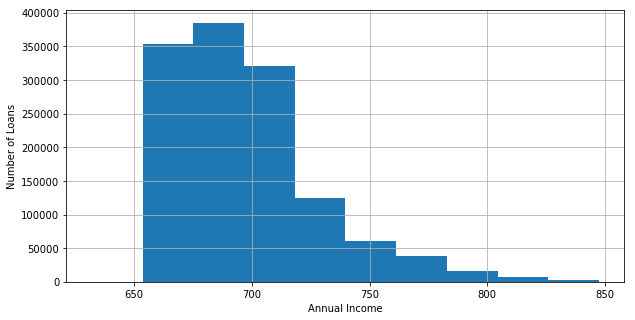

In [52]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))
%matplotlib inline

df.meanfico.hist(figsize=(10,5))
plt.ylabel('Number of Loans')
plt.xlabel('Annual Income')

In [58]:
df[['annual_inc','meanfico','dti']]

,annual_inc,meanfico,dti
0,130000.0,717.0,13
1,90000.0,692.0,3
2,26000.0,672.0,25
3,40000.0,662.0,16
4,33000.0,687.0,15
5,32760.0,677.0,27
6,100000.0,662.0,22
7,98000.0,717.0,6
8,102000.0,672.0,15
9,81500.0,687.0,16


In [61]:
df3 = pd.DataFrame()
df3 = df[['funded_amnt','emp_length_clean','loan_status','home_ownership','addr_state','grade','dti','meanfico']]
df3.head(5)

,funded_amnt,emp_length_clean,loan_status,home_ownership,addr_state,grade,dti,meanfico
0,12000,10,Fully Paid,MORTGAGE,CO,B,13,717.0
1,11100,10,Fully Paid,MORTGAGE,NY,C,3,692.0
2,9750,1,Fully Paid,RENT,CA,C,25,672.0
3,12000,10,Fully Paid,RENT,NM,B,16,662.0
4,8000,2,Charged Off,MORTGAGE,CO,B,15,687.0


In [68]:
df3['loan_status_bol'] = df3['loan_status'].map({'Current': 1, 'Fully Paid': 1, 'Charged Off':0, 'Late(31-120 days)':0, 'In Grace Period': 0, 'Late(16-30 days)': 0, 'Default': 0})

df3["loan_status_bol"] = df3["loan_status_bol"].apply(lambda loan_status_bol: 0 if loan_status_bol == 0 else 1)

C:\Users\antri\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\antri\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [69]:
df3.head(5)

,funded_amnt,emp_length_clean,loan_status,home_ownership,addr_state,grade,dti,meanfico,loan_status_bol
0,12000,10,Fully Paid,MORTGAGE,CO,B,13,717.0,1
1,11100,10,Fully Paid,MORTGAGE,NY,C,3,692.0,1
2,9750,1,Fully Paid,RENT,CA,C,25,672.0,1
3,12000,10,Fully Paid,RENT,NM,B,16,662.0,1
4,8000,2,Charged Off,MORTGAGE,CO,B,15,687.0,0


In [70]:
df3 = df3[['funded_amnt','emp_length_clean','addr_state','grade','dti','meanfico','loan_status_bol']]
df3.head(2)

,funded_amnt,emp_length_clean,addr_state,grade,dti,meanfico,loan_status_bol
0,12000,10,CO,B,13,717.0,1
1,11100,10,NY,C,3,692.0,1


In [80]:
df3['grade_new'] = 'M'
df3['grade_new'][df3['meanfico'] >= 720] = 'A'

df3['grade_new'][(df3['meanfico'] > 692) & (df3['meanfico'] < 720)] = 'B'
df3['grade_new'][(df3['meanfico'] > 685) & (df3['meanfico'] <= 692)] = 'C'
df3['grade_new'][(df3['meanfico'] > 681) & (df3['meanfico'] <= 685)] = 'D'
df3['grade_new'][(df3['meanfico'] > 677) & (df3['meanfico'] <= 681)] = 'E'
df3['grade_new'][(df3['meanfico'] > 670) & (df3['meanfico'] <= 677)] = 'F'
df3['grade_new'][(df3['meanfico'] >= 660) & (df3['meanfico'] <= 670)] = 'G'

df3['grade_new'][df3['meanfico'] < 660 ] = 'H'



C:\Users\antri\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\antri\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\antri\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\antri\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to

In [81]:
df3.head(5)  Amount Requested	Debt-To-Income Ratio	Risk_Score	State	emp_length	Application Date	loan_status	grade_new

,funded_amnt,emp_length_clean,addr_state,grade,dti,meanfico,loan_status_bol,grade_new
0,12000,10,CO,B,13,717.0,1,B
1,11100,10,NY,C,3,692.0,1,C
2,9750,1,CA,C,25,672.0,1,F
3,12000,10,NM,B,16,662.0,1,G
4,8000,2,CO,B,15,687.0,0,C


In [82]:
df4 = pd.DataFrame()
df4 = df3.rename(columns={'funded_amnt': 'Amount Requested', 'dti': 'Debt-To-Income Ratio','emp_length_clean': 'emp_length', 'addr_state': 'State','meanfico': 'Risk_Score', 'loan_status_bol': 'loan_status'})
df4.head(2)

,Amount Requested,emp_length,State,grade,Debt-To-Income Ratio,Risk_Score,loan_status,grade_new
0,12000,10,CO,B,13,717.0,1,B
1,11100,10,NY,C,3,692.0,1,C


In [83]:
df4.drop('grade', 1, inplace = True)
df4.head(2)

,Amount Requested,emp_length,State,Debt-To-Income Ratio,Risk_Score,loan_status,grade_new
0,12000,10,CO,13,717.0,1,B
1,11100,10,NY,3,692.0,1,C


In [84]:
df4.to_csv('LoanDataClassification.csv', index = None)

In [88]:
df4.shape

(1307181, 7)

In [85]:
df9 = pd.DataFrame()

In [90]:
df9 = pd.read_csv("DeclinedLoanClassification1.csv",delimiter=',', encoding="cp1252")

In [91]:
df10 = pd.DataFrame()
df10 = pd.concat([df4,df9], ignore_index = True, axis = 0)
df10

,Amount Requested,Debt-To-Income Ratio,Risk_Score,State,emp_length,grade_new,loan_status
0,12000.0,13.00,717.0,CO,10,B,1
1,11100.0,3.00,692.0,NY,10,C,1
2,9750.0,25.00,672.0,CA,1,F,1
3,12000.0,16.00,662.0,NM,10,G,1
4,8000.0,15.00,687.0,CO,2,C,0
5,11500.0,27.00,677.0,CA,4,F,1
6,24000.0,22.00,662.0,MI,10,G,1
7,15000.0,6.00,717.0,NY,10,B,1
8,10000.0,15.00,672.0,MA,7,F,1
9,20800.0,16.00,687.0,NY,10,C,1


In [92]:
df10.to_csv('LoanClassificationdataset.csv', index= None)